In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# setting file path
dir_data = './Day2data/'
filePath = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (filePath))
train= pd.read_csv(filePath)

Path of read in data: ./Day2data/application_train.csv


In [2]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [3]:
train['exact_age'] = train['DAYS_BIRTH']/(-365)
train['age_group'] = pd.cut(train['exact_age'],bins=4)
train['age_type'] = pd.cut(train['exact_age'],4,labels=False)
subset = train[['TARGET', 'age_group', 'age_type']]

In [4]:
subset.head()

,TARGET,age_group,age_type
0,1,"(20.469, 32.668]",0
1,0,"(44.819, 56.97]",2
2,0,"(44.819, 56.97]",2
3,0,"(44.819, 56.97]",2
4,0,"(44.819, 56.97]",2


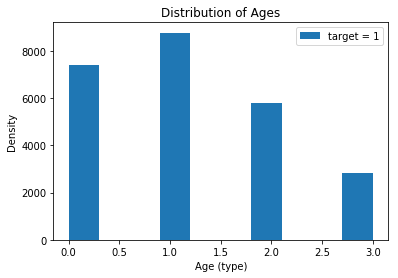

In [5]:
plt.hist(train.loc[train['TARGET'] == 1, 'age_type'], label = 'target = 1')
plt.legend()
plt.xlabel('Age (type)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

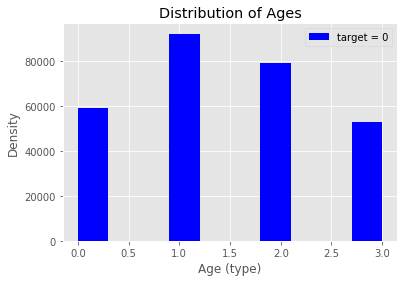

In [6]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET'] == 0, 'age_type'], label = 'target = 0',color = 'b')
plt.legend()
plt.xlabel('Age (type)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

In [7]:
train['INCOME_TYPE'] = pd.qcut(train['AMT_INCOME_TOTAL'],q=10,labels=False)
# train['age_group'] = pd.cut(train['exact_age'],bins=4)
# train['age_type'] = pd.cut(train['exact_age'],4,labels=False)
# subset = train[['TARGET', 'age_group', 'age_type']]

In [8]:
train['INCOME_TYPE'].head(10)

0    7
1    8
2    0
3    3
4    3
5    1
6    6
7    9
8    2
9    3
Name: INCOME_TYPE, dtype: int64

In [9]:
subset_income = train[['TARGET','AMT_INCOME_TOTAL','INCOME_TYPE']]

In [10]:
# get their correlation coefficient
np.corrcoef(train['TARGET'], train['INCOME_TYPE'])

array([[ 1.        , -0.01829098],
       [-0.01829098,  1.        ]])

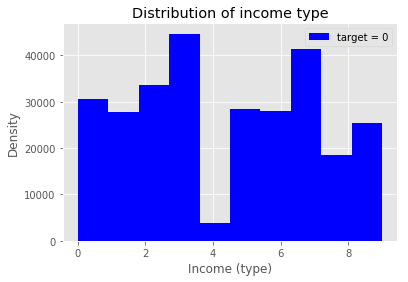

In [11]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET'] == 0, 'INCOME_TYPE'], label = 'target = 0',color = 'b')
plt.legend()
plt.xlabel('Income (type)'); plt.ylabel('Density'); plt.title('Distribution of income type');
plt.show()

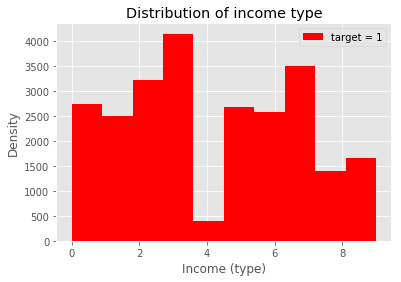

In [12]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET'] == 1, 'INCOME_TYPE'], label = 'target = 1',color = 'r')
plt.legend()
plt.xlabel('Income (type)'); plt.ylabel('Density'); plt.title('Distribution of income type');
plt.show()

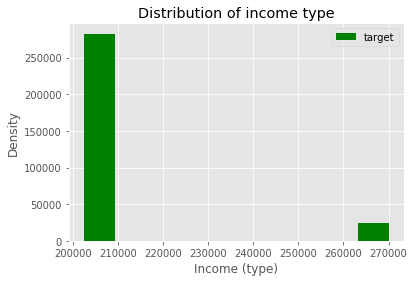

In [28]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET'] , 'AMT_INCOME_TOTAL'],label='target',color = 'g')
plt.legend()
plt.xlabel('Income (type)'); plt.ylabel('Density'); plt.title('Distribution of income type');
plt.show()

In [14]:
# replace the outlier with nan
train['DAYS_EMPLOYED_ANOM'] =train["DAYS_EMPLOYED"] == 365243
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [15]:
train['DAYS_EMPLOYED']=abs(train['DAYS_EMPLOYED'])

In [16]:
train['DAYS_EMPLOYED'].head(10)

0     637.0
1    1188.0
2     225.0
3    3039.0
4    3038.0
5    1588.0
6    3130.0
7     449.0
8       NaN
9    2019.0
Name: DAYS_EMPLOYED, dtype: float64

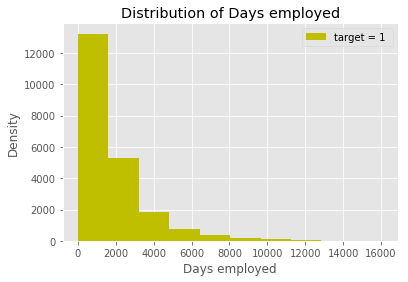

In [35]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET']==1 , 'DAYS_EMPLOYED'],label='target = 1 ',color = 'y')
plt.legend()
plt.xlabel('Days employed'); plt.ylabel('Density'); plt.title('Distribution of Days employed');
plt.show()

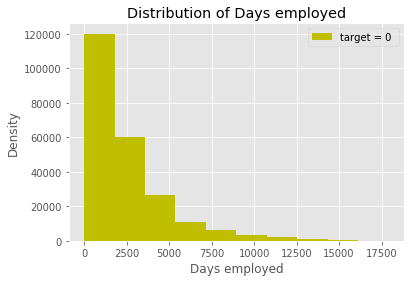

In [36]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET']==0 , 'DAYS_EMPLOYED'],label='target = 0 ',color = 'y')
plt.legend()
plt.xlabel('Days employed'); plt.ylabel('Density'); plt.title('Distribution of Days employed');
plt.show()

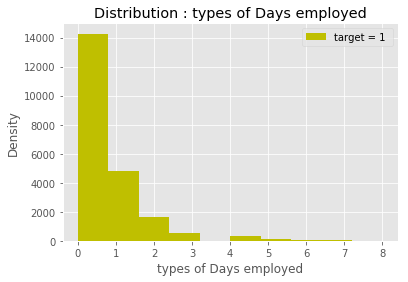

In [37]:
train['DAYS_EMPLOYED_TYPE'] = pd.cut(train['DAYS_EMPLOYED'],bins=10,labels=False)
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET']==1 , 'DAYS_EMPLOYED_TYPE'],label='target = 1 ',color = 'y')
plt.legend()
plt.xlabel('types of Days employed'); plt.ylabel('Density'); plt.title('Distribution : types of Days employed');
plt.show()

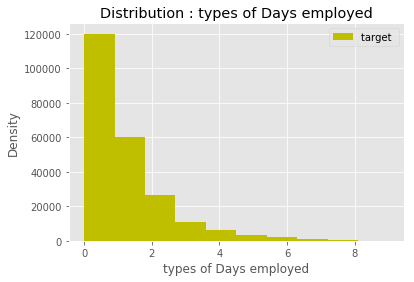

In [38]:
plt.style.use('ggplot')
plt.hist(train.loc[train['TARGET']==0 , 'DAYS_EMPLOYED_TYPE'],label='target ',color = 'y')
plt.legend()
plt.xlabel('types of Days employed'); plt.ylabel('Density'); plt.title('Distribution : types of Days employed');
plt.show()